## Intro

In [1]:
# Import Libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import scale, normalize
!pip install dtreeviz
from dtreeviz.trees import dtreeviz
from sklearn import preprocessing
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from shapely.geos import lgeos
#import fiona
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.metrics import accuracy_score
from math import radians, cos, sin, asin, sqrt
!pip install pygeos
!pip install rtree
!pip install geopandas
!pip install git+git://github.com/geopandas/geopandas.git

import geopandas
import pygeos
import rtree 


!pip install metpy
from metpy.interpolate import (interpolate_to_grid, remove_nan_observations,
                               remove_repeat_coordinates)

%matplotlib inline


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-8mu_8o17
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-8mu_8o17
  Created wheel for geopandas: filename=geopandas-0.9.0+43.g8c1e353-py2.py3-none-any.whl size=997385 sha256=0b4670a21bdc1dfedfe0297cbbca06533110cc591fe859fab9b3c11b8117b25c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4if675sz/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:109: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Open Earthchem dataset
df = pd.read_csv('/content/drive/MyDrive/earthchem_download_95122.txt', delimiter = "\t")
df

SAMPLE ID  IGSN  SOURCE  ... H2O_M.2 H2O_P.2  INDIUM.1
0      080385-4   NaN  GEOROC  ...     NaN     NaN       NaN
1      230483-3   NaN  GEOROC  ...     NaN     NaN       NaN
2      PU-02-34   NaN  GEOROC  ...     NaN     NaN       NaN
3      PU-02-25   NaN  GEOROC  ...     NaN     NaN       NaN
4      PU-02-20   NaN  GEOROC  ...     NaN     NaN       NaN
...         ...   ...     ...  ...     ...     ...       ...
3058  DBF-03-05   NaN  GEOROC  ...     NaN     NaN       NaN
3059    DBF04-6   NaN  GEOROC  ...     NaN     NaN       NaN
3060    DBF04-5   NaN  GEOROC  ...     NaN     NaN       NaN
3061    CHO 099   NaN  GEOROC  ...     NaN     0.0       NaN
3062    LAU-2/2   NaN  GEOROC  ...     NaN     NaN       NaN

[3063 rows x 151 columns]

In [4]:
# Drop Silica
df.dropna(subset=['SIO2'])

# Drop columns with less than 50% data 
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df

SAMPLE ID  SOURCE  ...     TH     ZR
0      080385-4  GEOROC  ...   8.60  282.0
1      230483-3  GEOROC  ...   4.30  195.0
2      PU-02-34  GEOROC  ...   8.30  307.0
3      PU-02-25  GEOROC  ...   9.18  342.0
4      PU-02-20  GEOROC  ...   8.82  308.0
...         ...     ...  ...    ...    ...
3058  DBF-03-05  GEOROC  ...    NaN    NaN
3059    DBF04-6  GEOROC  ...    NaN    NaN
3060    DBF04-5  GEOROC  ...    NaN    NaN
3061    CHO 099  GEOROC  ...   5.00  101.0
3062    LAU-2/2  GEOROC  ...  20.17  150.0

[3063 rows x 25 columns]

In [5]:
# Variables we are interested in ( except long/lat)
cluster_variables = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']
# All variables 
all_variables = ['LONGITUDE','LATITUDE','SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MNO', 'MGO',
       'CAO', 'NA2O', 'K2O', 'P2O5', 'BA', 'RB', 'SR', 'TH', 'ZR']

# All the data
data_all = df.dropna()
# Coordinates
coordinates = data_all.loc[:,['LONGITUDE','LATITUDE']]
# Elemental data
X = data_all[cluster_variables]

data_all


SAMPLE ID  SOURCE  ...     TH     ZR
0     080385-4  GEOROC  ...   8.60  282.0
1     230483-3  GEOROC  ...   4.30  195.0
2     PU-02-34  GEOROC  ...   8.30  307.0
3     PU-02-25  GEOROC  ...   9.18  342.0
4     PU-02-20  GEOROC  ...   8.82  308.0
...        ...     ...  ...    ...    ...
3055    RIG187  GEOROC  ...  18.40  108.0
3056   AJO 017  GEOROC  ...   4.00   73.0
3057    AJO017  GEOROC  ...  16.30  121.0
3061   CHO 099  GEOROC  ...   5.00  101.0
3062   LAU-2/2  GEOROC  ...  20.17  150.0

[1161 rows x 25 columns]

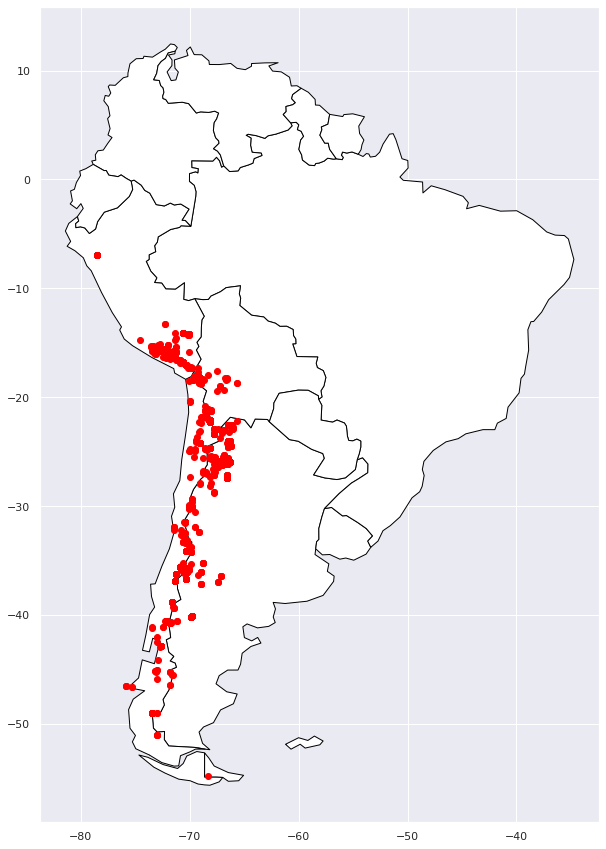

In [6]:
# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

plt.show()


# Clusters

## Salta, Argentina Cluster
Here, we will attempt to select samples near Salta, Argentina and try and predict whether or not they are geochemically different from other samples in South America. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

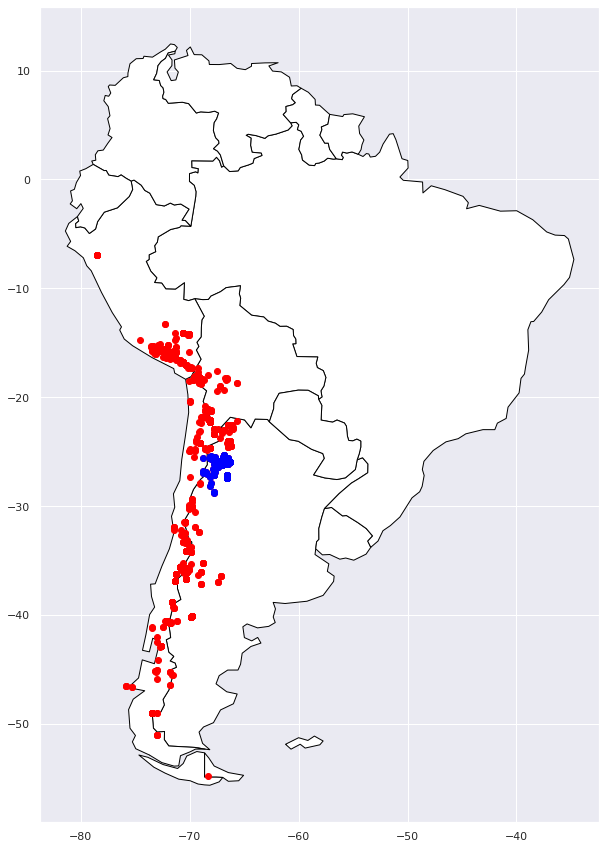

In [7]:
data_baby = df

# Defining the Salta Cluster Long/Lat
Salta_Cluster = data_all.loc[(data_all['LATITUDE'] <= -25) & (data_all['LATITUDE'] >= -29) ] 
Salta_Cluster = Salta_Cluster.loc[(Salta_Cluster['LONGITUDE'] <= -65) & (Salta_Cluster['LONGITUDE'] >= -69)]

# Mark samples in cluster with 'target'
Salta_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Salta_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index

# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Salta_Cluster, geometry=geopandas.points_from_xy(Salta_Cluster['LONGITUDE'],Salta_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()


## Ica, Peru Cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

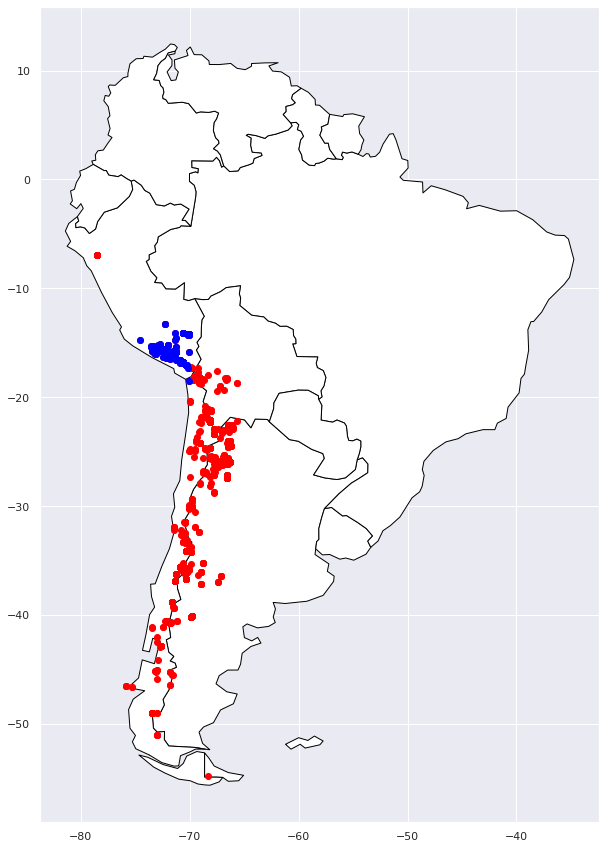

In [8]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat
Ica_Cluster = data_all.loc[(data_all['LATITUDE'] <= -13) & (data_all['LATITUDE'] >= -20) ] 
Ica_Cluster = Ica_Cluster.loc[(Ica_Cluster['LONGITUDE'] <= -70) & (Ica_Cluster['LONGITUDE'] >= -80)]

# Mark samples in cluster with 'target'
Ica_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Ica_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index

# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Ica_Cluster, geometry=geopandas.points_from_xy(Ica_Cluster['LONGITUDE'],Ica_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



_________________________________________________

## Zapala, Argentina Cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

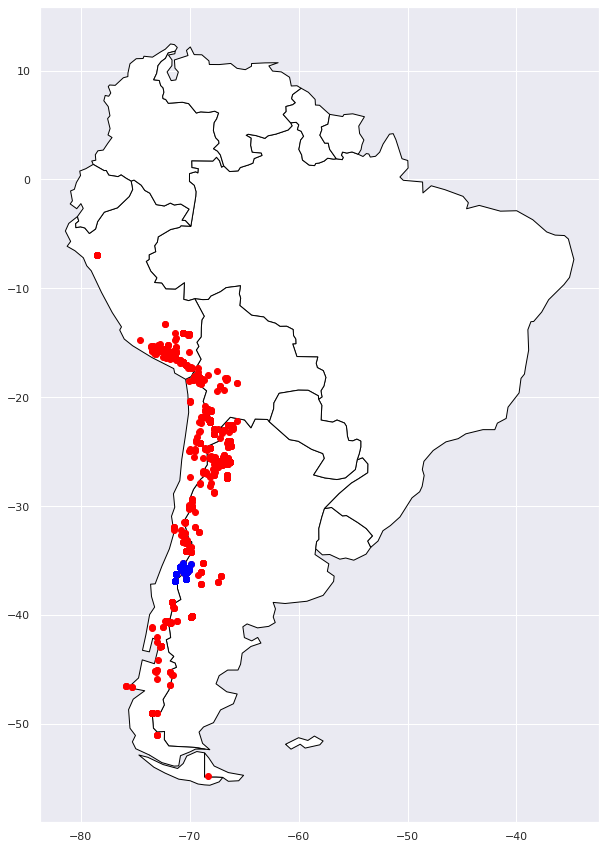

In [9]:

data_baby = df

# Defining the Zapala Cluster Long/Lat
Zapala_Cluster = data_all.loc[(data_all['LATITUDE'] <= -35) & (data_all['LATITUDE'] >= -38) ] 
Zapala_Cluster = Zapala_Cluster.loc[(Zapala_Cluster['LONGITUDE'] <= -69.5) & (Zapala_Cluster['LONGITUDE'] >= -73)]

# Mark samples in cluster with 'target'
Zapala_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Zapala_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Zapala_Cluster, geometry=geopandas.points_from_xy(Zapala_Cluster['LONGITUDE'],Zapala_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()

## Chaitén, Chile Cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

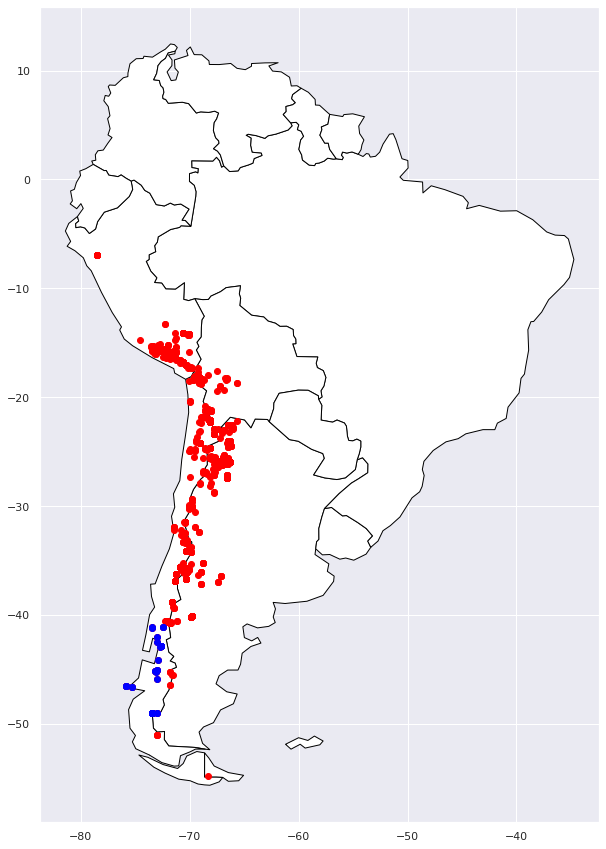

In [10]:

data_baby = df

# Defining the Ica, Peru cluster Long/Lat

Chaiten_Cluster = data_all.loc[(data_all['LATITUDE'] <= -41) & (data_all['LATITUDE'] >= -50) ] 
Chaiten_Cluster = Chaiten_Cluster.loc[(Chaiten_Cluster['LONGITUDE'] <= -72) & (Chaiten_Cluster['LONGITUDE'] >= -80)]



# Mark samples in cluster with 'target'
Chaiten_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Chaiten_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Chaiten_Cluster, geometry=geopandas.points_from_xy(Chaiten_Cluster['LONGITUDE'],Chaiten_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



## Testing - Longitude



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

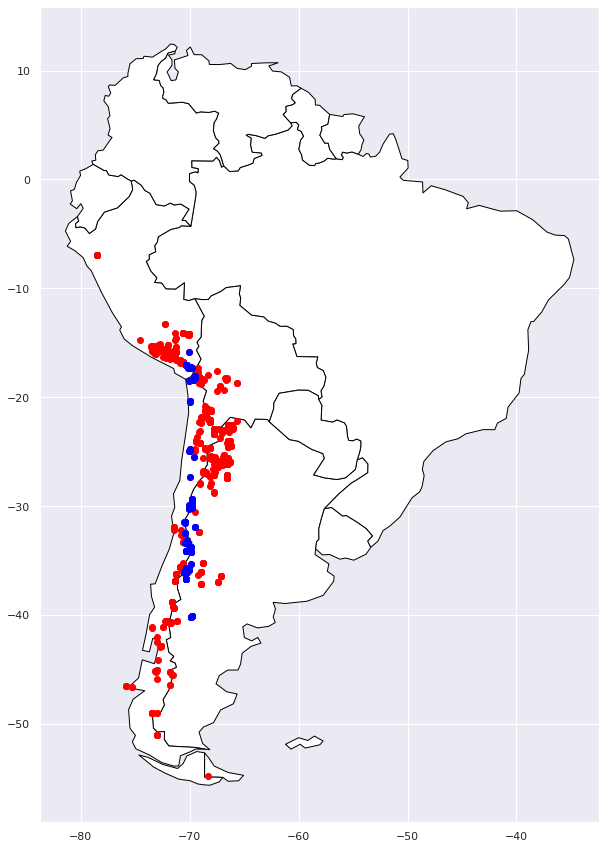

In [11]:

data_baby = df

# Defining the 69-70 Longitude cluster Long/Lat
Long_Cluster = data_all.loc[(data_all['LATITUDE'] <= -15) & (data_all['LATITUDE'] >= -55) ] 
Long_Cluster = Long_Cluster.loc[(Long_Cluster['LONGITUDE'] <= -69.5) & (Long_Cluster['LONGITUDE'] >= -70.5)]

# Mark samples in cluster with 'target'
Long_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Long_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Long_Cluster, geometry=geopandas.points_from_xy(Long_Cluster['LONGITUDE'],Long_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



## Testing - Latitude



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

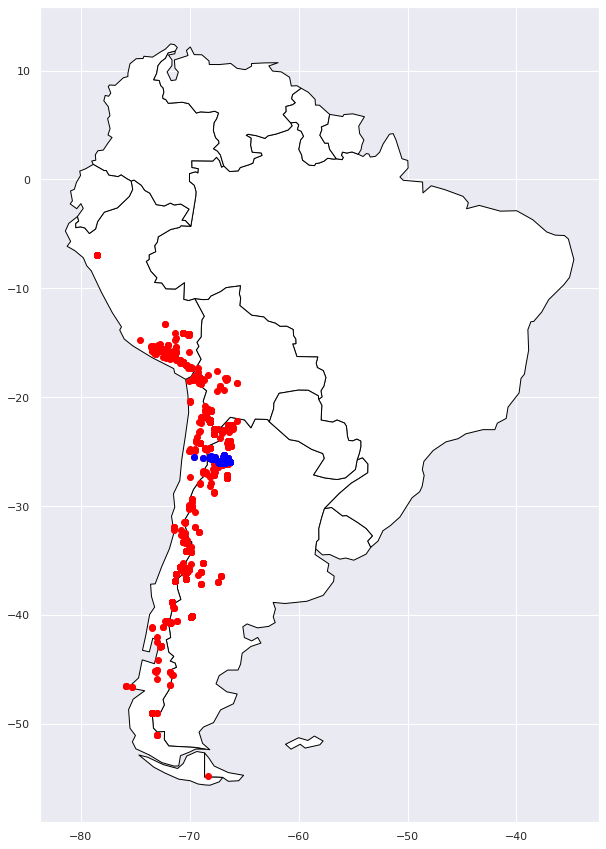

In [12]:

data_baby = df

# Defining the 25-26 Latitude cluster Long/Lat
Lat_Cluster = data_all.loc[(data_all['LATITUDE'] <= -25) & (data_all['LATITUDE'] >= -26) ] 
Lat_Cluster = Lat_Cluster.loc[(Lat_Cluster['LONGITUDE'] <= -64) & (Lat_Cluster['LONGITUDE'] >= -70.5)]

# Mark samples in cluster with 'target'
Lat_Cluster['target'] = 1

# Create a Target and ID column
# Add target column to full dataset 
data_all["target"] = Lat_Cluster["target"].astype(float).astype(int)

# For all samples not from cluster: target = 0
data_all['target'] = data_all['target'].fillna(0)

# Add id number column to full dataset
# id number starts at 0 ******
data_all['id_number'] = data_all.index


# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(Lat_Cluster, geometry=geopandas.points_from_xy(Lat_Cluster['LONGITUDE'],Lat_Cluster['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()

# Body

In [13]:
# create new dictionary for id numbers -> show long/lat
locations = pd.DataFrame(data_all,index = data_all['id_number'], columns = ['LATITUDE', 'LONGITUDE'])

# Checking to see that we can call id_number to get correct Lat/Long values
print(locations.head())
print(' ')
print(locations.loc[4])

           LATITUDE  LONGITUDE
id_number                     
0          -41.1000   -72.4930
1          -41.1000   -72.4930
2          -40.5088   -72.2060
3          -40.5275   -72.1812
4          -40.5675   -72.1743
 
LATITUDE    -40.5675
LONGITUDE   -72.1743
Name: 4, dtype: float64


___________________________________

Plot Data: Red all the samples & Blue shows the selected samples we are training/testing 

In [14]:
# Seed data
np.random.seed(64)

# Select X and y variables

X = data_all[cluster_variables]#.astype(int)
y = data_all['target'].astype(int)


In [15]:
# How many values are in the minority cluster vs. the rest of the data? 
data_all['target'].value_counts()

# 0 = other places = 848 samples 
# 1 = minority cluster = 313 samples

0.0    950
1.0    211
Name: target, dtype: int64

In [16]:
# Selecting samples for train and testing 
# 50/50 - yes in cluster/no in cluster
# If a sample is in the Salta cluster, randomly select 120 samples
# If a sample is elsewhere, randomly select 120 samples 

# when target = 0, save in y_0
data_0 = data_all[data_all['target'].isin([0])]

# when target = 1 or in Salta, save in y_1
data_1 = data_all[data_all['target'].isin([1])]

# Shuffle both variables with target/ without target
data_0 = data_0.sample(frac = 1)
data_1 = data_1.sample(frac = 1)

data_1


SAMPLE ID  SOURCE  ... target  id_number
1708     CG216  GEOROC  ...    1.0       1708
2995    CG 204  GEOROC  ...    1.0       2995
2459     AR201  GEOROC  ...    1.0       2459
2462     AR274  GEOROC  ...    1.0       2462
2474     AR120  GEOROC  ...    1.0       2474
...        ...     ...  ...    ...        ...
2760    SAF352  GEOROC  ...    1.0       2760
1518  SAF318BC  GEOROC  ...    1.0       1518
231    SAF331B  GEOROC  ...    1.0        231
3007     CG219  GEOROC  ...    1.0       3007
2468     AR167  GEOROC  ...    1.0       2468

[211 rows x 28 columns]

In [17]:
# Create train and test variables 

# split into train and test sets ( in the minoritiy data)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data_1[cluster_variables], data_1['target'], test_size=0.3, random_state=42)

# split into train and test sets ( in the majority data)
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(data_0[cluster_variables], data_0['target'], test_size=0.3, random_state=42)

# Add both target variables together - 120 samples per variable
y_train = pd.concat((y_train_1, y_train_0))
y_test = pd.concat((y_test_1, y_test_0))

# Get respective cluster variable values for X from y values
X_train = data_all.loc[y_train.index]
X_test = data_all.loc[y_test.index]

print(y_train)

2997    1.0
2432    1.0
2943    1.0
2945    1.0
2941    1.0
       ... 
1402    0.0
1542    0.0
992     0.0
91      0.0
1683    0.0
Name: target, Length: 812, dtype: float64


In [18]:
X_train_0

SIO2   TIO2   AL2O3   FEOT    MNO  ...     BA     RB     SR        TH     ZR
461   67.749  0.577  16.002  3.289  0.093  ...  605.0  100.0  275.0   8.00000  252.0
2663  76.151  0.150  12.420  0.801  0.040  ...  556.0  178.0   53.0  19.63000  120.0
288   70.270  0.683  14.181  4.052  0.111  ...  735.1   70.5  160.9   8.29000  362.0
1206  72.592  0.364  13.874  1.928  0.042  ...  850.0  123.0  437.0   8.28095  139.0
307   68.243  0.781  14.434  5.151  0.123  ...  658.0   62.0  169.0   7.66900  274.0
...      ...    ...     ...    ...    ...  ...    ...    ...    ...       ...    ...
1402  69.125  0.356  15.402  2.774  0.066  ...  930.0   39.0  669.0   1.12000  149.0
1542  66.911  0.582  15.546  3.621  0.082  ...  562.1  160.3  473.1  26.90000  148.1
992   76.743  0.124  12.936  0.703  0.038  ...  692.0   46.0  761.0   4.81000  137.0
91    68.381  0.402  16.791  2.304  0.050  ...  677.0   80.0  729.0   7.00000  111.5
1683  65.900  0.600  16.750  3.938  0.070  ...  448.0   53.0  608.0  10.00000  197.0

[665 rows x 15 columns]

## SMOTE

In [19]:
# Initiate SMOTE (minority data)
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_sample(X[cluster_variables], y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [20]:
# Turn X_train_res into dataframe 
X_train_res = pd.DataFrame(X_train_res)

# reanming the DataFrame columns
X_train_res.columns = cluster_variables

# Add target column
X_train_res['target'] = y_train_res


In [21]:
X_train_res

SIO2      TIO2      AL2O3  ...         TH          ZR  target
0     69.144000  0.565000  14.590000  ...   8.600000  282.000000       0
1     63.541000  0.796000  16.427000  ...   4.300000  195.000000       0
2     70.931000  0.340000  13.794000  ...   8.300000  307.000000       0
3     70.047000  0.688000  14.039000  ...   9.180000  342.000000       0
4     69.367000  0.531000  14.150000  ...   8.820000  308.000000       0
...         ...       ...        ...  ...        ...         ...     ...
1895  69.433379  0.600228  15.305687  ...  29.139740  188.365213       1
1896  66.147332  0.902181  15.919494  ...  26.702105  220.296215       1
1897  69.591077  0.635993  15.173089  ...  33.999336  194.730651       1
1898  70.308793  0.615311  14.901017  ...  31.589601  186.055844       1
1899  69.755608  0.551288  14.898432  ...  28.322669  177.269056       1

[1900 rows x 16 columns]

In [22]:
# Keep all dummy samples in minority data
# Drop all dummy samples in majority data
X_train_res.drop(X_train_res[X_train_res['target'] == 0].index, inplace = True)
y_train_res = X_train_res['target']

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (950, 16)
After OverSampling, the shape of train_y: (950,) 

After OverSampling, counts of label '1': 950
After OverSampling, counts of label '0': 0


In [23]:
# Smote dataset ( majority data + dummy minority data)

# X_train 
X_train_SMOTE = pd.concat((data_0[cluster_variables],X_train_res))
y_train_SMOTE = pd.concat((data_0['target'],y_train_res))

# Drop target column for X_train_SMOTE
X_train_SMOTE = X_train_SMOTE.drop(columns = 'target')


In [24]:
# SMOTE SVM? 


_____________________


## Feature Scaling

In [25]:
# Set variable for id number and coordinates
location = ['id_number', 'LATITUDE', 'LONGITUDE']

# Set temporary variable for location - X_Training
location_temp = X_train[location]

# Set temporary variable for location - X_Testing 
location_temp_X = X_test[location]

In [26]:
# Standardization (Z-score Normalization) 

In [27]:
# Z-score Normalization - X_Training
normalized_X_train=(X_train[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()
normalized_X_train_res=(X_train_res[cluster_variables]-X_train_res[cluster_variables].mean())/X_train_res[cluster_variables].std()


# Add back location data to normalized data - X_training 
normalized_X_train= pd.concat([normalized_X_train,
                               location_temp['id_number'],
                               location_temp['LATITUDE'],
                               location_temp['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_train
X_train = normalized_X_train
X_train_res = normalized_X_train_res
X_train.head()

SIO2      TIO2     AL2O3  ...  id_number  LATITUDE  LONGITUDE
2997 -0.021436  0.267896  0.026767  ...       2997  -25.8536   -66.8245
2432 -1.312925  1.219895  1.021473  ...       2432  -25.4617   -68.1217
2943  0.082621  0.417986 -0.163063  ...       2943  -25.6655   -66.8634
2945  0.011281  0.362239 -0.100039  ...       2945  -25.4920   -66.8631
2941  0.159864  0.366527 -0.351373  ...       2941  -25.5731   -66.8535

[5 rows x 18 columns]

In [28]:
# Z-score Normalization - X_Testing
normalized_X_test= (X_test[cluster_variables]-X_train[cluster_variables].mean())/X_train[cluster_variables].std()

# Add back location data to normalized data - X_Testing
normalized_X_test= pd.concat([normalized_X_test,
                               location_temp_X['id_number'],
                               location_temp_X['LATITUDE'],
                               location_temp_X['LONGITUDE']],
                               join = 'outer', axis = 1)
# Change name back to X_test
X_test= normalized_X_test
X_test.head()

SIO2   TIO2   AL2O3   FEOT  ...       ZR  id_number  LATITUDE  LONGITUDE
1531  70.786  0.610  14.297  2.999  ...  179.200       1531  -25.9800   -67.2100
2363  65.145  0.694  16.591  4.333  ...  230.000       2363  -25.8166   -66.3639
2740  70.435  0.563  14.540  2.694  ...  165.438       2740  -25.8342   -66.9036
2466  78.192  0.122  12.897  0.676  ...   41.000       2466  -25.6135   -67.8014
2996  69.010  0.619  15.480  3.096  ...  191.700       2996  -25.9300   -66.8100

[5 rows x 18 columns]

__________________________________________________

## Scatter Matrix Plots

- Training data
- Testing data

In [29]:
# Scatter Plot Matrix - on Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train[cluster_variables],
    dimensions=features,
    color= y_train
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [30]:
# Scatter Plot Matrix - on Testing data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_test[cluster_variables],
    dimensions=features,
    color= y_test,
    
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [31]:
# Scatter Plot Matrix - on SMOTE Training data
# geochemistry vs. each other
# colors show target: yellow = cluster; blue = other

features = cluster_variables

fig = px.scatter_matrix(
    X_train_SMOTE[cluster_variables],
    dimensions=features,
    color= y_train_SMOTE
)
fig.update_traces(diagonal_visible=False)
fig.show()

# New Section

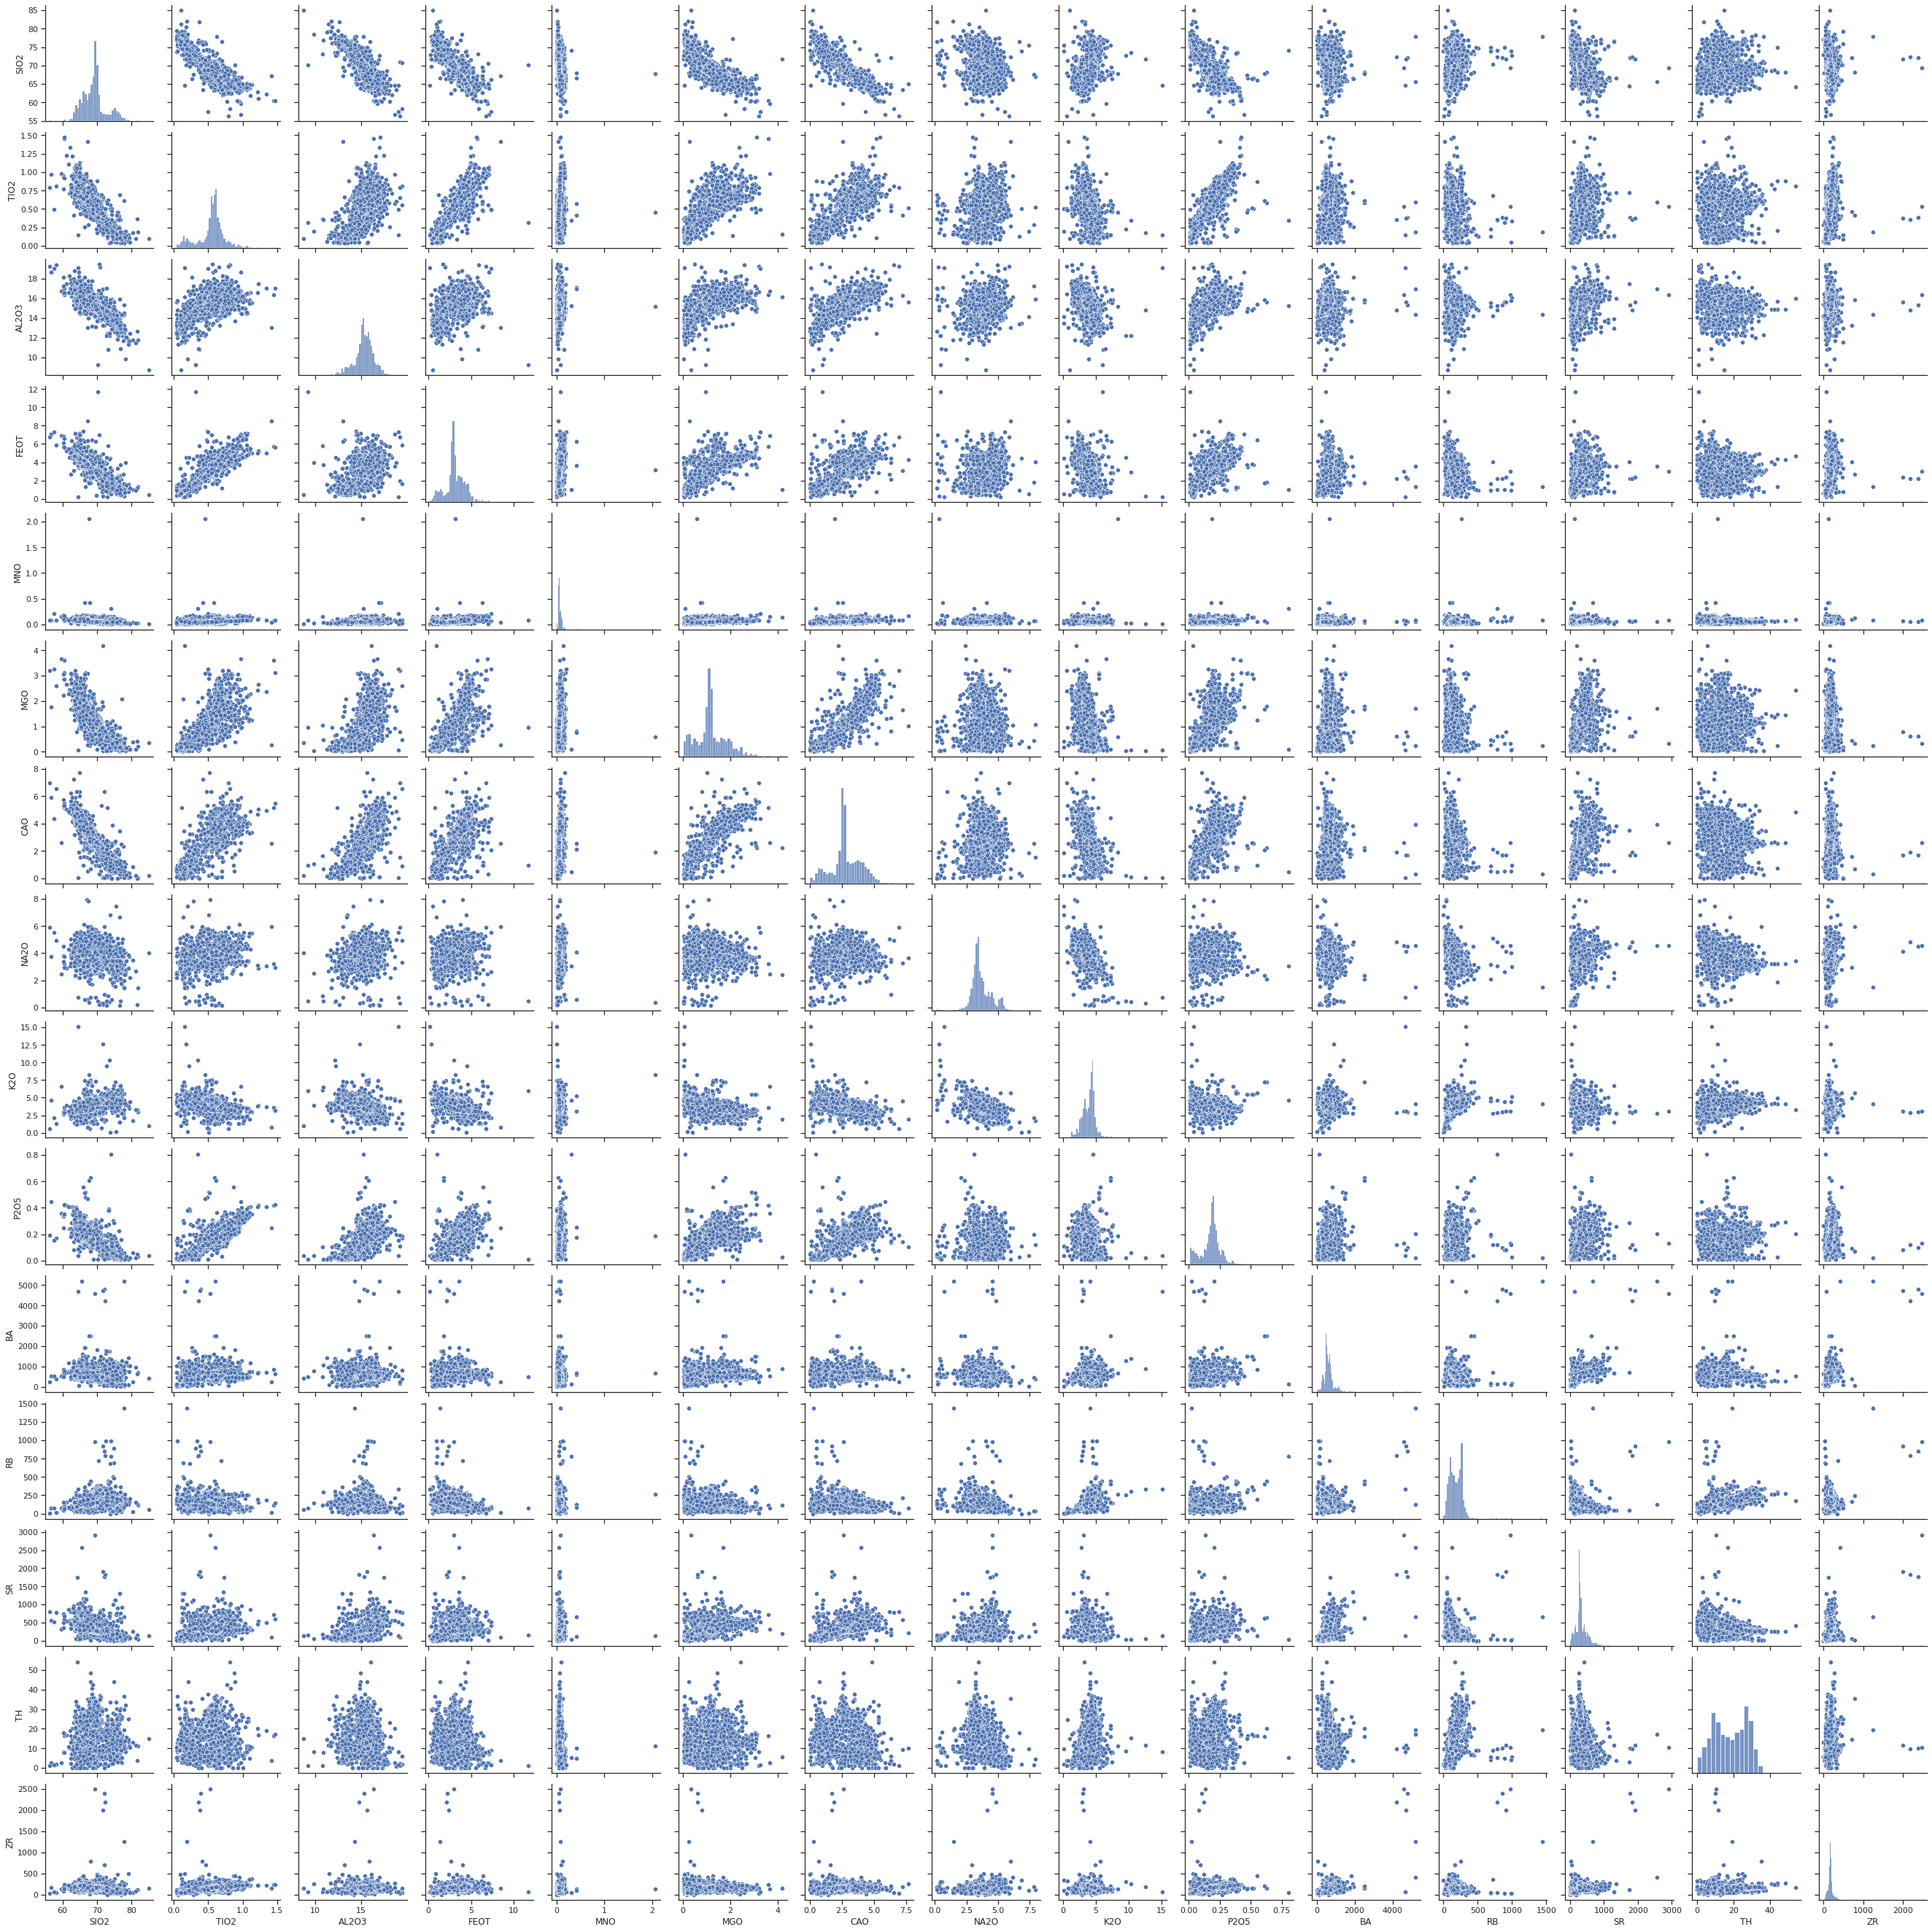

In [32]:
# Scatter plot of all SMOTE elements 
sns.set_theme(style="ticks")
sns.pairplot(X_train_SMOTE[cluster_variables])

___________________________

## PCA

1. scatter plot all of the principal components in training data
2. transformed PCA scatter
3. Variance vs. Components
4. SMOTE X_train_res

- From scatter plots, we see that it is dificult to cluster our target samples from the other samples. While there are regions where our target samples are located it isn't well seperated

- Transformed PCA doesn't seem to do much.

- There are around 2.5 number of components that explain the variance in the X_training data

In [33]:
# PCA - training data

pca = PCA()
pca.fit(X_train[cluster_variables])
X_pca = pca.transform(X_train[cluster_variables])
X_pca = pd.DataFrame(X_pca)
X_pca['target'] = y_train.values

print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)

original shape:    (812, 18)
transformed shape: (812, 16)


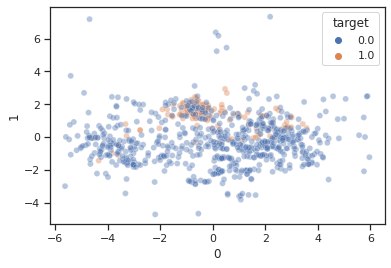

In [34]:
sns.scatterplot(x = 0, y=1,
                hue = 'target',
                data = X_pca,
                alpha = 0.4)

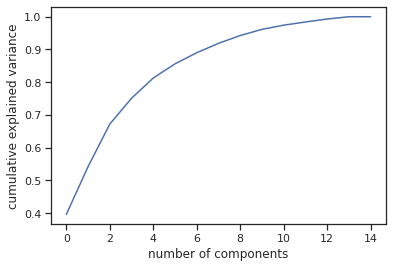

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

[Text(0, 0, 'SIO2'),
 Text(0, 0, 'TIO2'),
 Text(0, 0, 'AL2O3'),
 Text(0, 0, 'FEOT'),
 Text(0, 0, 'MNO'),
 Text(0, 0, 'MGO'),
 Text(0, 0, 'CAO'),
 Text(0, 0, 'NA2O'),
 Text(0, 0, 'K2O'),
 Text(0, 0, 'P2O5'),
 Text(0, 0, 'BA'),
 Text(0, 0, 'RB'),
 Text(0, 0, 'SR'),
 Text(0, 0, 'TH'),
 Text(0, 0, 'ZR')]

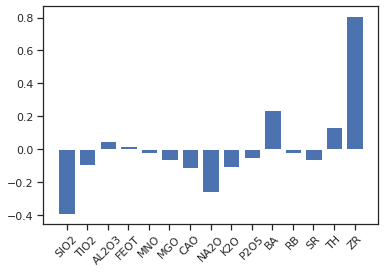

In [36]:
# PCA 1st components plot

fig,ax = plt.subplots()
ax.bar([x for x in range(len(pca.components_[:,0]))], pca.components_[:,0])
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

[Text(0, 0, 'SIO2'),
 Text(0, 0, 'TIO2'),
 Text(0, 0, 'AL2O3'),
 Text(0, 0, 'FEOT'),
 Text(0, 0, 'MNO'),
 Text(0, 0, 'MGO'),
 Text(0, 0, 'CAO'),
 Text(0, 0, 'NA2O'),
 Text(0, 0, 'K2O'),
 Text(0, 0, 'P2O5'),
 Text(0, 0, 'BA'),
 Text(0, 0, 'RB'),
 Text(0, 0, 'SR'),
 Text(0, 0, 'TH'),
 Text(0, 0, 'ZR')]

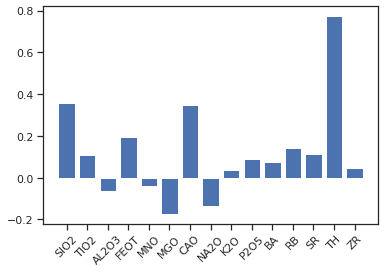

In [37]:
# PCA 2nd components plot

fig,ax = plt.subplots()
ax.bar([x for x in range(len(pca.components_[:,1]))], pca.components_[:,1])
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

In [38]:
y_train_SMOTE

647     0.0
56      0.0
2901    0.0
2417    0.0
1520    0.0
       ... 
1895    1.0
1896    1.0
1897    1.0
1898    1.0
1899    1.0
Name: target, Length: 1900, dtype: float64

In [39]:
# PCA - SMOTE training data


pca = PCA()
pca.fit(X_train_SMOTE[cluster_variables])
X_pca_SMOTE = pca.transform(X_train_SMOTE[cluster_variables])
X_pca_SMOTE = pd.DataFrame(X_pca_SMOTE)

X_pca_SMOTE['target'] = y_train_SMOTE.values



print(' ')
print("original shape:   ", X_train_SMOTE.shape)
print("transformed shape:", X_pca_SMOTE.shape)

 
original shape:    (1900, 15)
transformed shape: (1900, 16)


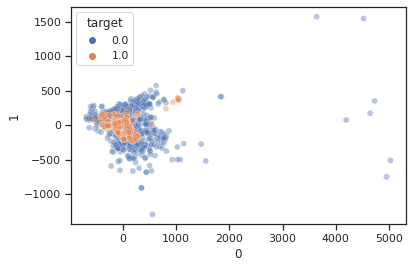

In [40]:
sns.scatterplot(x = 0, y=1,
                hue = X_pca_SMOTE['target'],
                data = X_pca_SMOTE,
                alpha = 0.4)

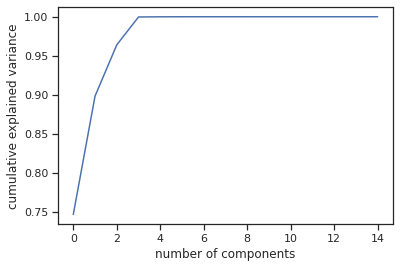

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

__________________________________________

## RandomForestClassifier

- X_train
- Second time X_train
- X_test
- Long on y_train
- Lat on y_train

Feature Importance: 
1. Variable: RB                   Importance: 0.19
2. Variable: NA2O                 Importance: 0.17
3. Variable: TH                   Importance: 0.15
4. Variable: K2O                  Importance: 0.07
  
- Consistantly, RB, NA2O, TH, and K2O are the top four most important features. Although for each training set, they might be at a different level of importance. They still remain the top 4 important variables 

- Randomforest on Latitude is more accurate than Longitude


In [42]:
# RandomForestClassifier - Inital with X_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_train[cluster_variables], y_train)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - Inital with X_train
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8166189111747851]
 
[[285   0]
 [ 64   0]]


Here, we see that we get an accurracy score of ~80- 91%

In [43]:
# Saving feature names for later use
feature_list = list(cluster_variables)

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: TH                   Importance: 0.32
Variable: RB                   Importance: 0.16
Variable: NA2O                 Importance: 0.09
Variable: K2O                  Importance: 0.07
Variable: SIO2                 Importance: 0.06
Variable: TIO2                 Importance: 0.06
Variable: MNO                  Importance: 0.05
Variable: SR                   Importance: 0.04
Variable: CAO                  Importance: 0.03
Variable: P2O5                 Importance: 0.03
Variable: ZR                   Importance: 0.03
Variable: FEOT                 Importance: 0.02
Variable: MGO                  Importance: 0.02
Variable: BA                   Importance: 0.02
Variable: AL2O3                Importance: 0.0


In [44]:
# RandomForestClassifier - with X_test

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
rf.fit(X_test[cluster_variables], y_test)
pred = rf.predict(X_test[cluster_variables])
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.9312320916905444]
 
[[280   5]
 [ 19  45]]


In [45]:
# RandomForestClassifier - Long on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#X_test_std = X_test_std.values.reshape(-1,1)

rf.fit(X_train['LONGITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LONGITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print(scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

[0.8796561604584527]
 
[[250  35]
 [  7  57]]


In [46]:
# RandomForestClassifier - Lat on y_train

scores = []
  
# using regression to get predicted data
rf = RandomForestClassifier(n_estimators=100, max_depth=2)

#for train_index, test_index in sss.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
 #   y_train, y_test = y.iloc[train_index], y.iloc[test_index]

rf.fit(X_train['LATITUDE'].values.reshape(-1,1), y_train)
pred = rf.predict(X_test['LATITUDE'].values.reshape(-1,1))
scores.append(accuracy_score(y_test, pred))
  
# get accurracy of each prediction
print('Accurracy of each prediction:  ',scores)
print(' ')

# Confusion matrix: RandomForestClassifier - with X_test
cnf_matrix = metrics.confusion_matrix(y_test, pred)
print(cnf_matrix)

Accurracy of each prediction:   [1.0]
 
[[285   0]
 [  0  64]]


- Randomforest on Latitude is more accurate than Longitude

________________

##RandomForestRegression

- Geochemistry
- Latitude
- Longitude


Feature Importance for RandomForestRegression: 
1. Variable: ZR                   Importance: 0.27
2. Variable: TH                   Importance: 0.24
3. Variable: SR                   Importance: 0.13
4. Variable: RB                   Importance: 0.7

For geochemistry, Longitude, and Latitude these four elements are the most important. Some elements are different from the RandomForestClassifier. The elements that overlap include TH and RB. 


Mean Absolute Error: 0.4030773638968482
Mean Squared Error: 0.17423255587392553
Root Mean Squared Error: 0.41741173423123307
 
Accuracy: -0.16347036940789494


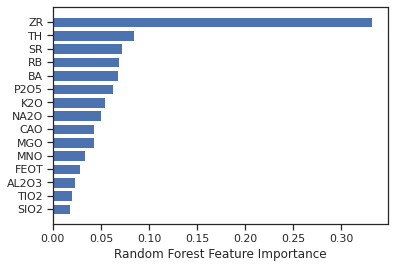

In [47]:
# RandomForestRegression - on geochemistry

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Bar plot important features
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], y_test))


In [48]:
X_test

SIO2   TIO2   AL2O3   FEOT  ...       ZR  id_number  LATITUDE  LONGITUDE
1531  70.786  0.610  14.297  2.999  ...  179.200       1531  -25.9800   -67.2100
2363  65.145  0.694  16.591  4.333  ...  230.000       2363  -25.8166   -66.3639
2740  70.435  0.563  14.540  2.694  ...  165.438       2740  -25.8342   -66.9036
2466  78.192  0.122  12.897  0.676  ...   41.000       2466  -25.6135   -67.8014
2996  69.010  0.619  15.480  3.096  ...  191.700       2996  -25.9300   -66.8100
...      ...    ...     ...    ...  ...      ...        ...       ...        ...
1433  66.244  0.748  16.166  3.886  ...  251.000       1433  -22.2600   -68.1700
152   75.344  0.140  14.026  1.344  ...  108.000        152  -42.8364   -72.6413
594   66.556  0.564  16.218  3.617  ...  289.212        594  -35.6530   -70.7610
2216  65.630  0.614  16.689  3.962  ...  118.000       2216  -24.6700   -68.1700
124   64.448  0.584  17.287  4.319  ...  127.000        124  -36.2000   -71.2700

[349 rows x 18 columns]

In [49]:
# RandomForestRegression - on coordinates ( lat/long)

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train[cluster_variables], X_train[['LONGITUDE','LATITUDE']])#.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X_test[cluster_variables])

print(len(X_train[cluster_variables]))
print(len(X_train[['LONGITUDE','LATITUDE']]))

812
812


Mean Absolute Error: 5.158749682378236
Mean Squared Error: 47.88186505556547
Root Mean Squared Error: 6.919672322846326
 
Accuracy: -0.1449713759017138


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



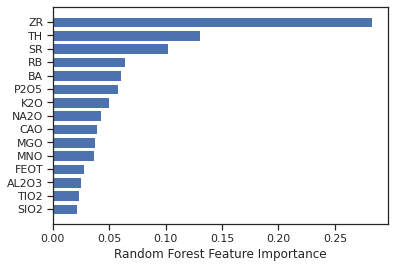

In [50]:
# Evaluating the Algorithm - location

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(X_test[['LONGITUDE','LATITUDE']], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(X_test[['LONGITUDE','LATITUDE']], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X_test[['LONGITUDE','LATITUDE']], y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(X_test[cluster_variables], X_test[['LONGITUDE','LATITUDE']]))

In [51]:
# RandomForestRegression - on coordinates ( lat/long)

# Fitting Random Forest Regression to the Training set
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(data_all[cluster_variables], data_all[['LONGITUDE','LATITUDE']]) #.values.reshape(-1,1))

# Predicting the Test set results
y_pred = regressor.predict(X[cluster_variables])



Mean Absolute Error: 0.6328978302781552
Mean Squared Error: 1.5379411053922398
Root Mean Squared Error: 1.2401375348695158
 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning:

The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').



Accuracy: 0.962981651270564


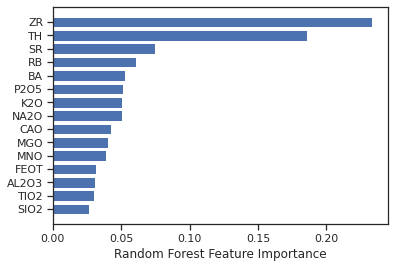

In [52]:
# Evaluating the Algorithm- all 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(data_all[['LONGITUDE','LATITUDE']], y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(data_all[['LONGITUDE','LATITUDE']], y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_all[['LONGITUDE','LATITUDE']], y_pred)))

sorted_idx = regressor.feature_importances_.argsort()
plt.barh(cluster_variables, regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

print(' ')
print("Accuracy:", regressor.score(data_all[cluster_variables], data_all[['LONGITUDE','LATITUDE']]))

____________________________


## LogisticRegression

- X_train
- Latitude
- Longitude
- SMOTE X_train_res

Feature Importance for LogisticRegression: Different each time
(Appeared a couple times in top 4...)
1. Variable: TIO2                Importance: 1.4
2. Variable: TH                  Importance: 1.3


The most important features keep changing for each sample of training data. The only element that reappears is TiO2. However, this element does not match the top five elements for RandomForestRegression or RandomForestClassifier. The accuracy is decent (~75). 


Mean Absolute Error: 0.19484240687679083
Mean Squared Error: 0.19484240687679083
Root Mean Squared Error: 0.44140956817539745
 
 
Accuracy: 0.8051575931232091
Precision: 0.25
Recall: 0.03125
 
[[279   6]
 [ 62   2]]


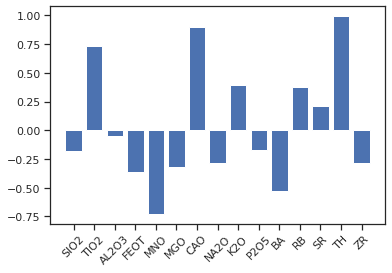

In [53]:
# Instantiate  LogisticRegression - X_train
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train[cluster_variables],y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Feature Importance for LogisticRegression: 
1. Variable: TH                  Importance: 1.4
2. Variable: CAO                 Importance: 1.3
3. Variable: TIO2                Importance: 0.9
4. Variable: SR                  Importance: 0.85

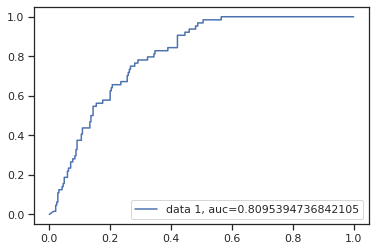

In [54]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - X_train
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Here we see a Reciever operating curve which shows true positives rate against false positive rate. We see that we get a AUC score of 0.91 which is pretty good suggesting that we have a decent classifier. 

Mean Absolute Error: 0.1833810888252149
Mean Squared Error: 0.1833810888252149
Root Mean Squared Error: 0.4282301820577514
 
 
Accuracy: 0.8166189111747851
Precision: 0.0
Recall: 0.0
 
[[285   0]
 [ 64   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



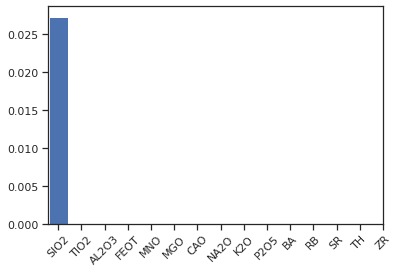

In [55]:
# Instantiate  LogisticRegression - Lat
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LATITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LATITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

In [56]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Lat
# Plotting of the true positive rate against the false positive rate

#y_pred_proba = logreg.predict_proba(X_train['LATITUDE'].values.reshape(-1,1))[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

Mean Absolute Error: 0.20057306590257878
Mean Squared Error: 0.20057306590257878
Root Mean Squared Error: 0.44785384435391284
 
 
Accuracy: 0.7994269340974212
Precision: 0.4423076923076923
Recall: 0.359375
 
[[256  29]
 [ 41  23]]


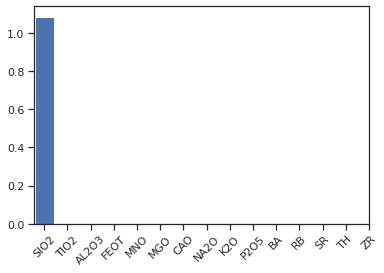

In [57]:
# Instantiate  LogisticRegression - Longitude
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train['LONGITUDE'].values.reshape(-1,1),y_train)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test['LONGITUDE'].values.reshape(-1,1))

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

In [58]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - Long
# Plotting of the true positive rate against the false positive rate

#y_pred_proba = logreg.predict_proba(X_train['LONGITUDE'].values.reshape(-1,1))[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( Pretty good )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Mean Absolute Error: 0.16332378223495703
Mean Squared Error: 0.16332378223495703
Root Mean Squared Error: 0.40413337184023423
 
 
Accuracy: 0.836676217765043
Precision: 0.5333333333333333
Recall: 0.875
 
[[236  49]
 [  8  56]]
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       285
         1.0       0.53      0.88      0.66        64

    accuracy                           0.84       349
   macro avg       0.75      0.85      0.78       349
weighted avg       0.89      0.84      0.85       349



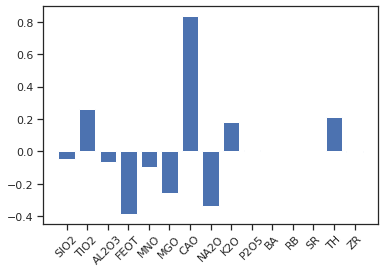

In [59]:
# Instantiate  LogisticRegression - SMOTE X_train_res
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_SMOTE[cluster_variables],y_train_SMOTE)

# coef out
lrcoef = logreg.coef_
lrintercept = logreg.intercept_

y_pred=logreg.predict(X_test[cluster_variables])

# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(' ')

# get importance
importance = logreg.coef_[0] #abs(logreg.coef_[0]) # absolute value

# Create Coef plot
fig,ax = plt.subplots()
ax.bar([x for x in range(len(importance))], importance)
ax.set_xticks(np.arange(15))
ax.set_xticklabels(cluster_variables,rotation=45)

print(' ')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(' ')
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


  
# print classification report
print(classification_report(y_test, y_pred))

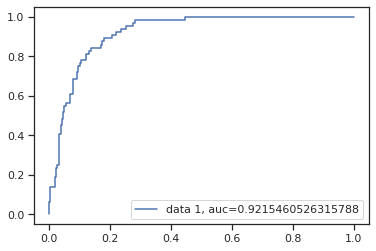

In [60]:
# Receiver Operating Characteristic(ROC) curve: LogisticRegression - SMOTE X_train_res
# Plotting of the true positive rate against the false positive rate

y_pred_proba = logreg.predict_proba(X_test[cluster_variables])[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# AUC score 1 represents perfect classifier, 
#     and 0.5 represents a worthless classifier.
# AUC score for the case is 0.88. ( good )

_______

## Outliers

In [61]:
## Analyzing Outliers 

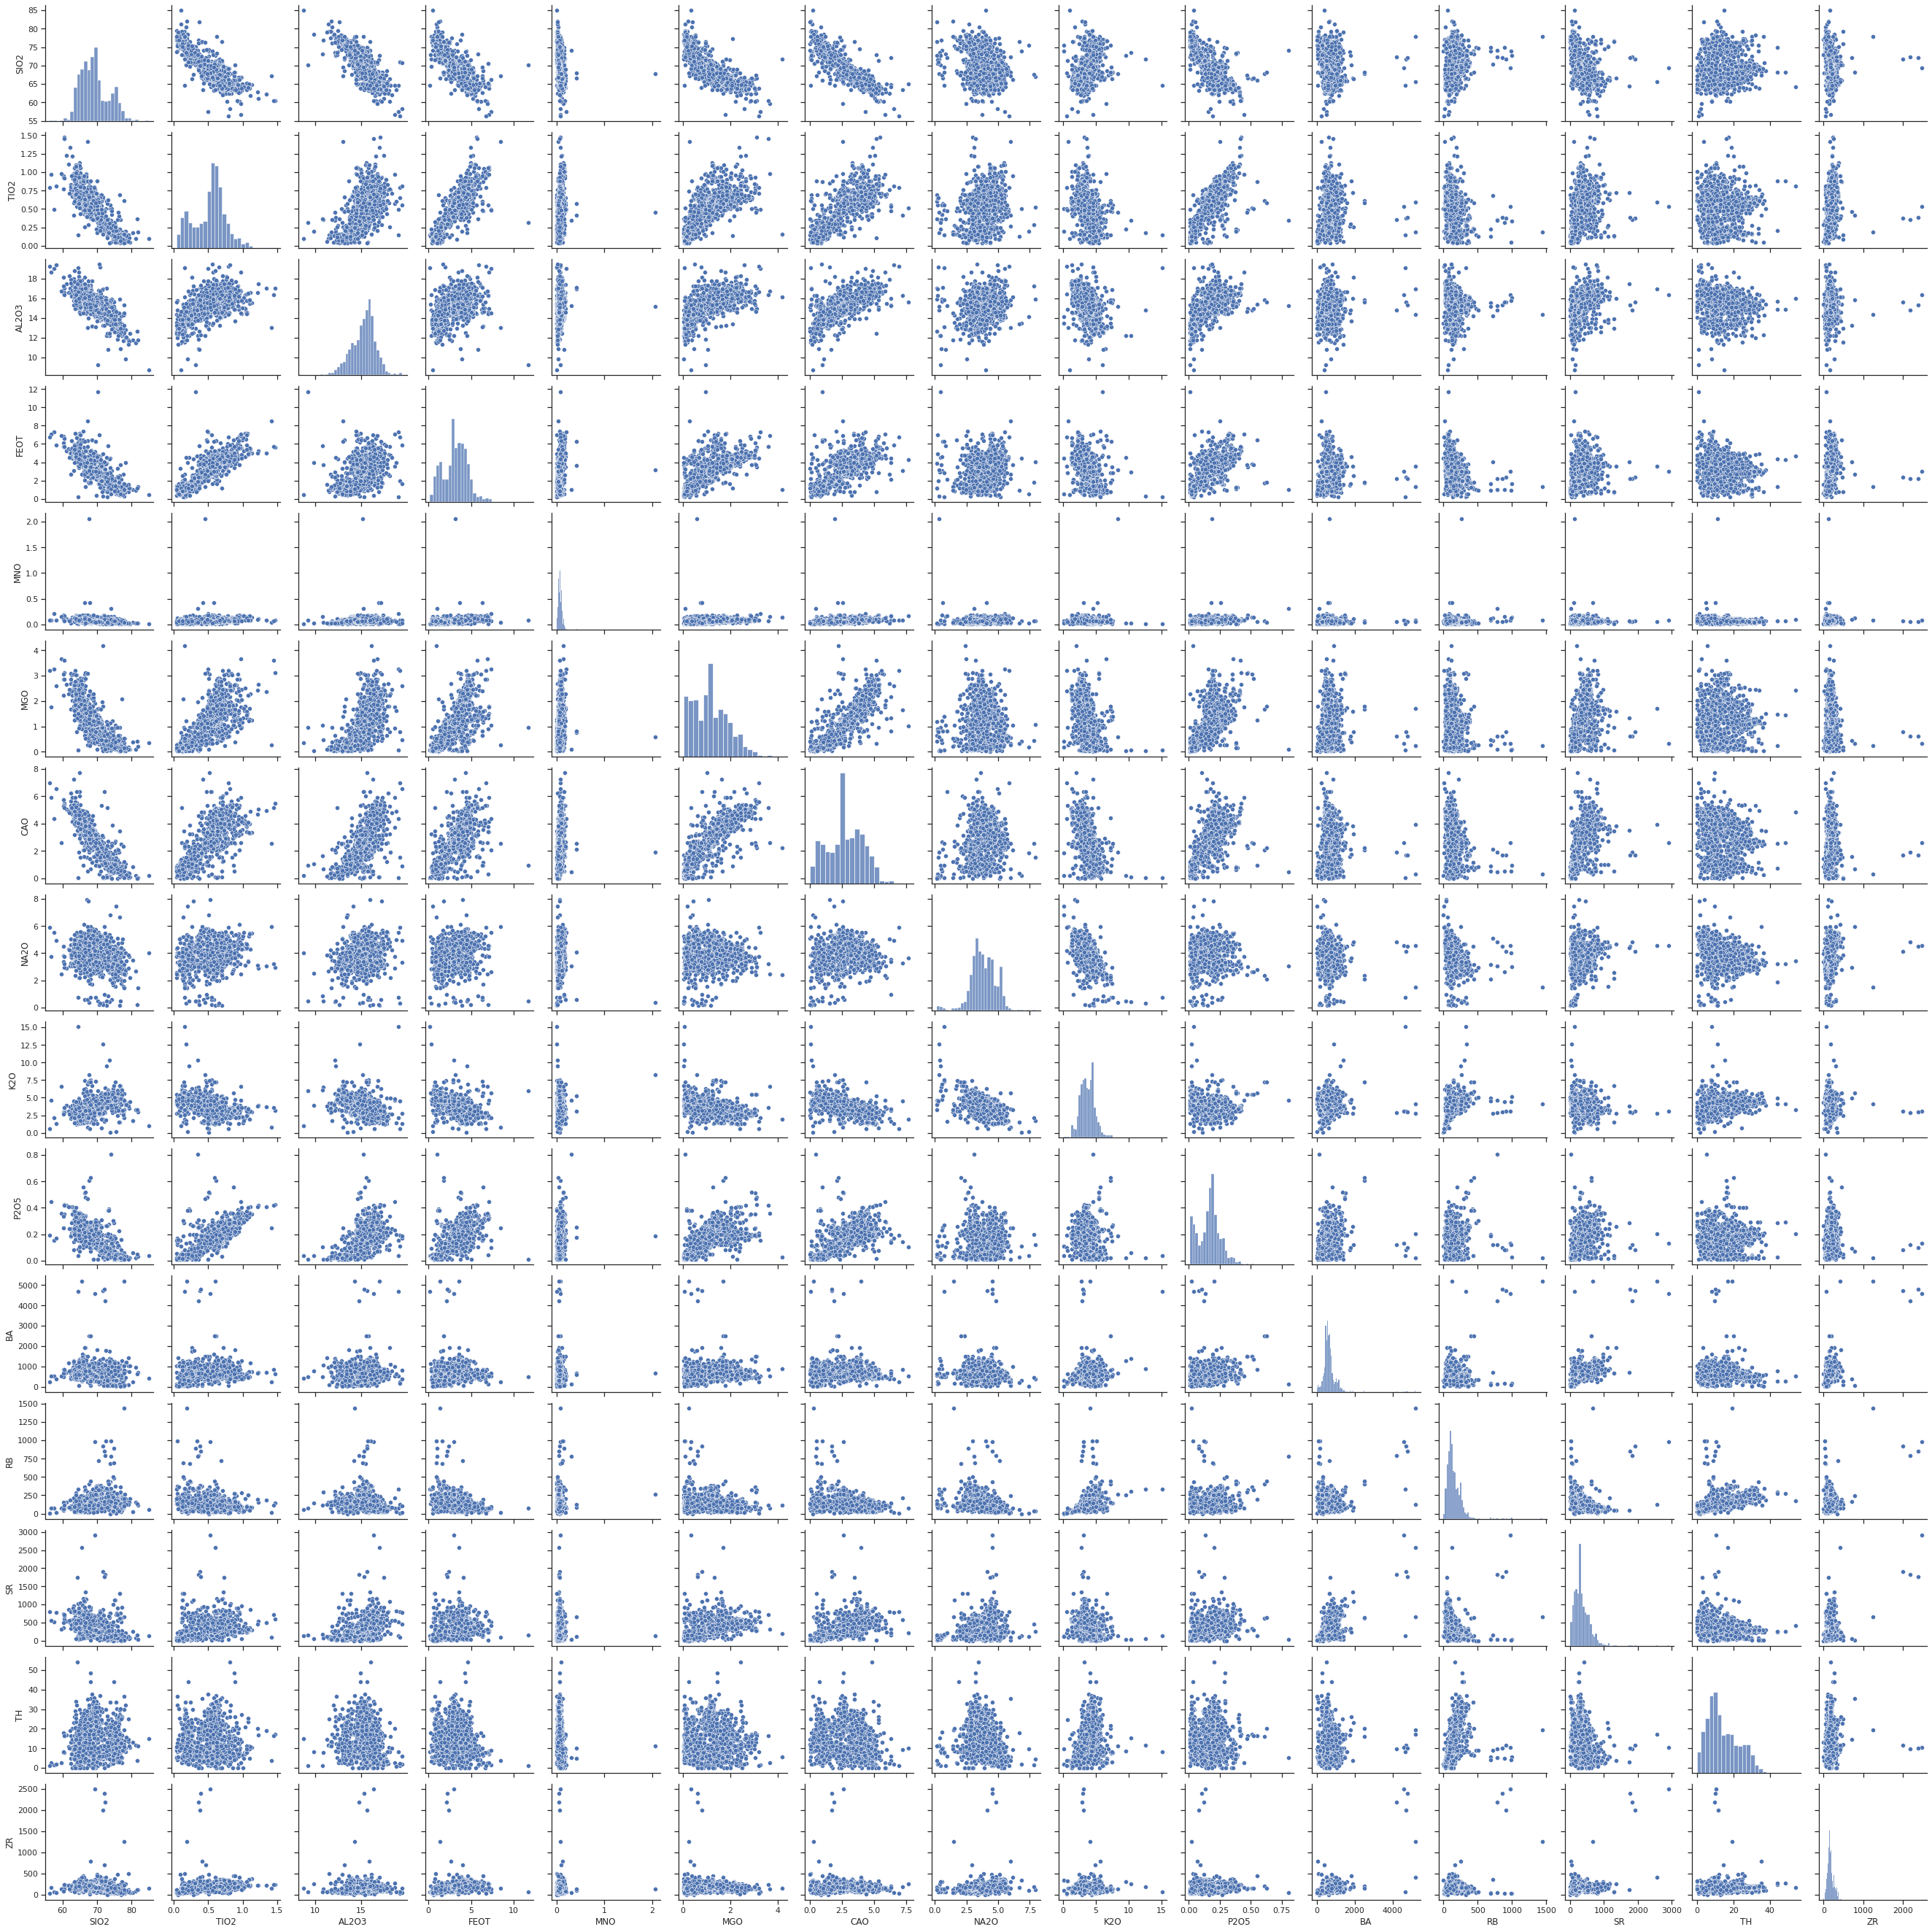

In [62]:
# Scatter plot
sns.set_theme(style="ticks")
sns.pairplot(X[cluster_variables])

In [ ]:
# Since Zr comes up for significance i will look at the outliers for them 

sns.pairplot(data_all, hue="target")

In [ ]:
X.describe()

### ZR Outliers

In [ ]:
# ZR Outliers
# If sample element (ZR) is greater than its 99% (361),

Outlier_ZR = data_all.loc[(data_all['ZR'] > 361)]
Outlier_ZR

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot ZR Outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_ZR, geometry=geopandas.points_from_xy(Outlier_ZR['LONGITUDE'],Outlier_ZR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### P2O5 Outliers

In [ ]:
# P2O5 Outliers
# If sample element (P2O5) is greater than its 99% (0.3114),

Outlier_P2O5 = data_all.loc[(data_all['P2O5'] > 0.3114)]
Outlier_P2O5

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot P2O5 outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_P2O5, geometry=geopandas.points_from_xy(Outlier_P2O5['LONGITUDE'],Outlier_P2O5['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### K2O Outliers

In [ ]:
# K2O Outliers
# If sample element (K2O) is greater than its 99% (5.7),

Outlier_K2O = data_all.loc[(data_all['K2O'] > 5.7)]
Outlier_K2O

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot K2O outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_K2O, geometry=geopandas.points_from_xy(Outlier_K2O['LONGITUDE'],Outlier_K2O['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()

### NA2O Outliers

In [ ]:
# NA2O  Outliers
# If sample element (NA2O ) is greater than its 99% (5.4887),

Outlier_NA2O  = data_all.loc[(data_all['NA2O'] > 5.4887)]
Outlier_NA2O 

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot NA2O outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_NA2O, geometry=geopandas.points_from_xy(Outlier_NA2O['LONGITUDE'],Outlier_NA2O['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()

### CAO Outliers

In [ ]:
# CAO Outliers
# If sample element (CAO ) is greater than its 99% (5.2216),

Outlier_CAO  = data_all.loc[(data_all['CAO'] > 5.2216)]
Outlier_CAO 

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot CAO outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_CAO, geometry=geopandas.points_from_xy(Outlier_CAO['LONGITUDE'],Outlier_CAO['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()

### MNO Outliers

In [ ]:
# MNO Outliers
# If sample element (MNO ) is greater than its 99% (0.1617),

Outlier_MNO  = data_all.loc[(data_all['MNO'] > 0.1617)]
Outlier_MNO 

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot MNO outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_MNO, geometry=geopandas.points_from_xy(Outlier_MNO['LONGITUDE'],Outlier_MNO['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()

### FEOT Outliers

In [ ]:
# FEOT Outliers
# If sample element (FEOT) is greater than its 99% (5.5727),

Outlier_FEOT = data_all.loc[(data_all['FEOT'] > 5.5727)]
Outlier_FEOT

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot FEOT outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_FEOT, geometry=geopandas.points_from_xy(Outlier_FEOT['LONGITUDE'],Outlier_FEOT['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()

### TIO2 Outliers

In [ ]:
# TIO2 Outliers
# If sample element (TIO2) is greater than its 99%  (0.8926),

Outlier_TIO2 = data_all.loc[(data_all['TIO2'] > 0.8926)]
Outlier_TIO2

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot TIO2 outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_TIO2, geometry=geopandas.points_from_xy(Outlier_TIO2['LONGITUDE'],Outlier_TIO2['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### TH Outliers

In [ ]:
# TH Outliers
# If sample element (TH) is greater than its 99%  (28.737),

Outlier_TH = data_all.loc[(data_all['TH'] > 28.737)]
Outlier_TH

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot TH outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_TH, geometry=geopandas.points_from_xy(Outlier_TH['LONGITUDE'],Outlier_TH['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### BA Outliers

In [ ]:
# BA Outliers
# If sample element (BA) is greater than its 99%(1181),

Outlier_BA = data_all.loc[(data_all['BA'] > 1181)]
Outlier_BA

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot BA outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_BA, geometry=geopandas.points_from_xy(Outlier_BA['LONGITUDE'],Outlier_BA['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### RB Outliers

In [ ]:
# RB Outliers
# If sample element (RB) is greater than its 99% (312),

Outlier_RB = data_all.loc[(data_all['RB'] > 312)]
Outlier_RB

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot RB outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_RB, geometry=geopandas.points_from_xy(Outlier_RB['LONGITUDE'],Outlier_RB['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### SR Outliers *

In [ ]:
# SR Outliers
# If sample element (SR) is greater than its 99% (711),

Outlier_SR = data_all.loc[(data_all['SR'] > 850)]
Outlier_SR

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot SR outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_SR, geometry=geopandas.points_from_xy(Outlier_SR['LONGITUDE'],Outlier_SR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### TIO2 vs. ZR

In [ ]:
# TIO2 vs. ZR Outliers
# If sample element (TIO2 AND ZR) is greater than its 99%

Outlier_TIO2_ZR = data_all.loc[data_all['TIO2'] > 0.8926]
Outlier_TIO2_ZR = data_all.loc[(data_all['ZR'] > 361)]
# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot TIO2_ZR outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_TIO2_ZR, geometry=geopandas.points_from_xy(Outlier_TIO2_ZR['LONGITUDE'],Outlier_TIO2_ZR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### RB AND ZR

In [ ]:
# RB vs. ZR Outliers
# If sample element (RB AND ZR) is greater than its 99%

Outlier_RB_ZR = data_all.loc[data_all['RB'] > 0.312]
Outlier_RB_ZR = data_all.loc[(data_all['ZR'] > 361)]

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot Outlier_RB_ZR outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_RB_ZR, geometry=geopandas.points_from_xy(Outlier_RB_ZR['LONGITUDE'],Outlier_RB_ZR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### ZR VS TH


In [ ]:
# Th vs. ZR Outliers
# If sample element (TH AND ZR) is greater than its 99%

Outlier_TH_ZR = data_all.loc[data_all['TH'] > 28.737]
Outlier_TH_ZR = data_all.loc[(data_all['ZR'] > 361)]

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot Outlier_TH_ZR outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_TH_ZR, geometry=geopandas.points_from_xy(Outlier_TH_ZR['LONGITUDE'],Outlier_TH_ZR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### BA VS ZR

In [ ]:
# BA vs. ZR Outliers
# If sample element (BA AND ZR) is greater than its 99%

Outlier_BA_ZR = data_all.loc[data_all['BA'] > 1181]
Outlier_BA_ZR = data_all.loc[(data_all['ZR'] > 361)]

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot Outlier_BA_ZR outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_BA_ZR, geometry=geopandas.points_from_xy(Outlier_BA_ZR['LONGITUDE'],Outlier_BA_ZR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


### MNO VS ZR

In [ ]:
# MNO vs. ZR Outliers
# If sample element (MNO AND ZR) is greater than its 99%

Outlier_MNO_ZR = data_all.loc[data_all['MNO'] > 0.1617]
Outlier_MNO_ZR = data_all.loc[(data_all['ZR'] > 361)]

# Plot the location of the outliers 

gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='black')

# Plot Outlier_MNO_ZR outlier samples 
gdf = geopandas.GeoDataFrame(Outlier_MNO_ZR, geometry=geopandas.points_from_xy(Outlier_MNO_ZR['LONGITUDE'],Outlier_MNO_ZR['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')
plt.show()


## Meshgrid plot

### TH locations

In [ ]:
import shapely
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(data_all,
                             geometry=geopandas.points_from_xy(data_all.LONGITUDE,
                                                               data_all.LATITUDE),
                                                               crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")

gdf = gdf.drop(columns=['SIO2',
 'TIO2',
 'AL2O3',
 'FEOT',
 'MNO',
 'MGO',
 'CAO',
 'NA2O',
 'K2O',
 'P2O5',
 'BA',
 'RB',
 'SR',
 'ZR',
 'LATITUDE', 'LONGITUDE'])

# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, markersize=.1, figsize=(30, 23), column='TH', cmap='jet',legend=True)

plt.show()


In [ ]:
# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [ ]:

# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

ax = gdf.plot(ax=ax, markersize=.1, figsize=(15, 8), column='TH', cmap='jet',legend=True) #shows points
#plt.autoscale(False) # doesnt really do anything
cell.plot(ax=ax, facecolor="none", edgecolor='grey') # shows grid 
ax.axis("off")


In [ ]:
gdf.head()

In [ ]:
cell

# if element_cell is NaN kernel density estimator

In [ ]:
merged = geopandas.sjoin(gdf,cell,how ='left',op='within')
merged

In [ ]:
# make a simple count variable that we can sum
merged['element_cell']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'element_cell'] = dissolve.element_cell.values

In [ ]:
# Element TH location ( data all - numpy)

TH_location = pd.DataFrame(data_all[['LONGITUDE',"LATITUDE",'TH']])
TH_location = np.array(TH_location)
TH_location

In [ ]:
import matplotlib.tri as tri

x = TH_location[:,0]
y = TH_location[:,1]
z = TH_location[:,2] 

# Create grid values first.
xi = np.linspace(x.min(),x.max(),30 )
yi = np.linspace(y.min(),y.max(),100 )

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

zi.shape
plt.imshow(zi)

In [ ]:
fig, (ax1) = plt.subplots(nrows=1)
ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko',mfc='none', ms=2)
ax1.set_title('TH in SA')

In [ ]:
# TH elemental plot in SA

# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

#fig, (ax1) = plt.subplots(nrows=1)
ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax)
ax.plot(x, y, 'ko',mfc='none', ms=5, alpha=0.2)
ax.set_title('TH in SA')

plt.show()

### ZR locations

In [ ]:
import shapely
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(data_all,
                             geometry=geopandas.points_from_xy(data_all.LONGITUDE,
                                                               data_all.LATITUDE),
                                                               crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")

gdf = gdf.drop(columns=['SIO2',
 'TIO2',
 'AL2O3',
 'FEOT',
 'MNO',
 'MGO',
 'CAO',
 'NA2O',
 'K2O',
 'P2O5',
 'BA',
 'RB',
 'SR',
 'TH',
 'LATITUDE', 'LONGITUDE'])
# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)


In [ ]:
merged = geopandas.sjoin(gdf,cell,how ='left',op='within')
merged

# make a simple count variable that we can sum
merged['element_cell']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'element_cell'] = dissolve.element_cell.values

In [ ]:
# Element ZR location ( data all - numpy)

ZR_location = pd.DataFrame(data_all[['LONGITUDE',"LATITUDE",'ZR']])
ZR_location = np.array(ZR_location)

x = ZR_location[:,0]
y = ZR_location[:,1]
z = ZR_location[:,2] 

# Create grid values first.
xi = np.linspace(x.min(),x.max(),30 )
yi = np.linspace(y.min(),y.max(),100 )

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

zi.shape
plt.imshow(zi)

In [ ]:
fig, (ax1) = plt.subplots(nrows=1)
ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko',mfc='none', ms=2)
ax1.set_title('ZR in SA')

In [ ]:
# TH elemental plot in SA

# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

#fig, (ax1) = plt.subplots(nrows=1)
ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax)
ax.plot(x, y, 'ko',mfc='none', ms=4, alpha=0.6)
ax.set_title('ZR in SA')

plt.show()

In [ ]:
weird_ZR=locations.loc[(data_all['LATITUDE'] <= -42) & (data_all['LATITUDE'] >= -48) ] 
weird_ZR

In [ ]:
#weird_ZR_REF = (93,99,100,102,113,114,|152,154,155,156,158,159,161,162,171,|246,1622,1623,1625,1626,1629,1641)
blah = data_all.loc[data_all['id_number'] == 113]
blah

In [ ]:

# Plotting the High ZR papers 

target = {'DEMANT, A.; SUAREZ, M.; DE LA CRUZ, R., 2007':1,
          #'NARANJO, J. A.; STERN, C. R., 1998':2,
          #'GUIVEL, C.; LAGABRIELLE, Y.; BOURGOIS, J.; MAURY, R. C.; FOURCADE, S.; MARTIN, H.; ARNAUD, N. O., 1999':3,
          #'LOWENSTERN, J. B.; BLEICK, H.; VAZQUEZ, J. A.; CASTRO, J. M.; LARSON, P. B., 2012':4,
          #'ESPINOZA, F.; MORATA, D.; PELLETER, E.; MAURY, R. C.; SUAREZ, M.; LAGABRIELLE, Y.; POLVE, M.; BELLON, H.; COTTEN, J.; DE LA CRUZ, R.; GUIVEL, C., 2005':5

          }

#df = pd.read_csv('earthchem_download_95122.txt', delimiter = "\t")
limitPer = len(df) * .50
df = df.dropna(thresh=limitPer, axis=1)
df.columns
data_four = df

data_four['target']= data_four['REFERENCE'].map(target)

# Missing values are given a '?'. First replace them with np.NaN to facilitate removing them with pandas:
data_four['target'] = data_four['target'].fillna(0)
# Make target column int
data_four['target'] = data_four['target'].astype(float).astype(int)

# Drop targets that are not the 4 references
data_four = data_four[data_four['target'] >=1]
data_four

# Plot all samples
gdf = geopandas.GeoDataFrame(data_all, geometry=geopandas.points_from_xy(data_all['LONGITUDE'],data_all['LATITUDE']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

  # We restrict to South America.
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='red')

# Plot samples we are selecting to train/test
gdf = geopandas.GeoDataFrame(data_four, geometry=geopandas.points_from_xy(data_four['LONGITUDE'],data_four['LATITUDE']))
  # We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax,color='blue')
plt.show()



In [ ]:
data_four
# Demant paper has HIGH ZR levels 

### SR locations

In [ ]:
import shapely
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(data_all,
                             geometry=geopandas.points_from_xy(data_all.LONGITUDE,
                                                               data_all.LATITUDE),
                                                               crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")

gdf = gdf.drop(columns=['SIO2',
 'TIO2',
 'AL2O3',
 'FEOT',
 'MNO',
 'MGO',
 'CAO',
 'NA2O',
 'K2O',
 'P2O5',
 'BA',
 'RB',
 'ZR',
 #'SR',
 'TH',
 'LATITUDE', 'LONGITUDE'])

# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)


In [ ]:
merged = geopandas.sjoin(gdf,cell,how ='left',op='within')
merged

# make a simple count variable that we can sum
merged['element_cell']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'element_cell'] = dissolve.element_cell.values

In [ ]:
# Element SR location ( data all - numpy)

SR_location = pd.DataFrame(data_all[['LONGITUDE',"LATITUDE",'SR']])
SR_location = np.array(SR_location)

x = SR_location[:,0]
y = SR_location[:,1]
z = SR_location[:,2] 

# Create grid values first.
xi = np.linspace(x.min(),x.max(),30 )
yi = np.linspace(y.min(),y.max(),100 )

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

zi.shape
plt.imshow(zi)

In [ ]:
fig, (ax1) = plt.subplots(nrows=1)
ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko',mfc='none', ms=2)
ax1.set_title('SR in SA')

In [ ]:
# SR elemental plot in SA

# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

#fig, (ax1) = plt.subplots(nrows=1)
ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax)
ax.plot(x, y, 'ko',mfc='none', ms=4, alpha=0.6)
ax.set_title('SR in SA')

plt.show()

### RB locations

In [ ]:
import shapely
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(data_all,
                             geometry=geopandas.points_from_xy(data_all.LONGITUDE,
                                                               data_all.LATITUDE),
                                                               crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")

gdf = gdf.drop(columns=['SIO2',
 'TIO2',
 'AL2O3',
 'FEOT',
 'MNO',
 'MGO',
 'CAO',
 'NA2O',
 'K2O',
 'P2O5',
 'BA',
 #'RB',
 'ZR',
 'SR',
 'TH',
 'LATITUDE', 'LONGITUDE'])

# total area for the grid
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=30
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)


In [ ]:
merged = geopandas.sjoin(gdf,cell,how ='left',op='within')
merged

# make a simple count variable that we can sum
merged['element_cell']=1
# Compute stats per grid cell -- aggregate fires to grid cells with dissolve
dissolve = merged.dissolve(by="index_right", aggfunc="count")
# put this into cell
cell.loc[dissolve.index, 'element_cell'] = dissolve.element_cell.values

In [ ]:
# Element RB location ( data all - numpy)

RB_location = pd.DataFrame(data_all[['LONGITUDE',"LATITUDE",'RB']])
RB_location = np.array(SR_location)

x = RB_location[:,0]
y = RB_location[:,1]
z = RB_location[:,2] 

# Create grid values first.
xi = np.linspace(x.min(),x.max(),30 )
yi = np.linspace(y.min(),y.max(),100 )

# Linearly interpolate the data (x, y) on a grid defined by (xi, yi).
triang = tri.Triangulation(x, y)
interpolator = tri.LinearTriInterpolator(triang, z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

zi.shape
plt.imshow(zi)

In [ ]:
fig, (ax1) = plt.subplots(nrows=1)
ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x, y, 'ko',mfc='none', ms=2)
ax1.set_title('SR in SA')

In [ ]:
# RB elemental plot in SA

# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

#fig, (ax1) = plt.subplots(nrows=1)
ax.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax)
ax.plot(x, y, 'ko',mfc='none', ms=4, alpha=0.6)
ax.set_title('RB in SA')

plt.show()

##Other Plots

In [ ]:
# We restrict to South America.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'South America'].plot(color="white", edgecolor='black',figsize = (25,15))

ax = cell.plot(ax=ax,column='element_cell', figsize=(25, 15), cmap='viridis', vmax=28, edgecolor="grey",legend=True)
plt.autoscale(False)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.to_crs(cell.crs).plot(ax=ax, color='none', edgecolor='black')

plt.show()

